In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
#read in the data
df = pd.read_csv("Traffic.csv")
print(df.head())

          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  


In [3]:
#get rid of the date in the time column
def convert_to_military_time(time_str):
    try:
        # Try to parse as 12-hour format
        return pd.to_datetime(time_str, format='%I:%M:%S %p').strftime('%H:%M:%S')
    except ValueError:
        return pd.to_datetime(time_str, format='%H:%M:%S').strftime('%H:%M:%S')

df['Time'] = df['Time'].apply(convert_to_military_time)

#replace string attributes with numerical values in the Time column to use it in the model
df['Time'] = df['Time'].str.replace(':', '').astype(int)

# display new time column
print(df['Time'])

0            0
1         1500
2         3000
3         4500
4        10000
         ...  
2971    224500
2972    230000
2973    231500
2974    233000
2975    234500
Name: Time, Length: 2976, dtype: int32


In [4]:
#label encoding - use this on categorical data
Le = LabelEncoder()
df['Day of the week'] = Le.fit_transform(df['Day of the week'])

#create our X and y variables for the model
X = df.drop(columns=["Traffic Situation"]) #features
y = df["Traffic Situation"] #target variable


#label encoding for the target variable
y = Le.fit_transform(y)

#print the encoded values mapped to the original values
print("Label Encoded Values for Traffic Situation:")
print(dict(zip(Le.transform(Le.classes_), Le.classes_)))

#show the value counts of the target variable
print(pd.Series(y).value_counts())
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Label Encoded Values for Traffic Situation:
{0: 'heavy', 1: 'high', 2: 'low', 3: 'normal'}
3    1669
0     682
1     321
2     304
Name: count, dtype: int64


Accuracy: 99.22%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       197
           1       0.98      0.97      0.97        88
           2       1.00      1.00      1.00        93
           3       0.99      0.99      0.99       515

    accuracy                           0.99       893
   macro avg       0.99      0.99      0.99       893
weighted avg       0.99      0.99      0.99       893



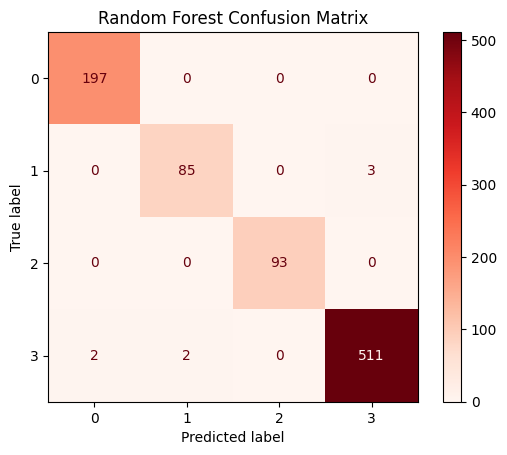

In [5]:
#train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")
plt.title("Random Forest Confusion Matrix")
plt.show()

Accuracy: 99.78%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      0.98      0.99        88
           2       1.00      1.00      1.00        93
           3       1.00      1.00      1.00       515

    accuracy                           1.00       893
   macro avg       1.00      0.99      1.00       893
weighted avg       1.00      1.00      1.00       893



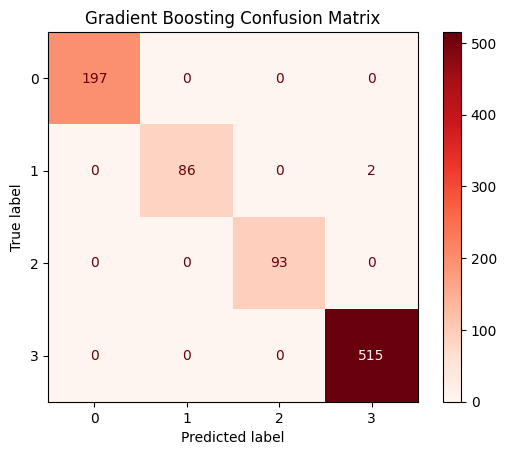

In [6]:
#gradient boosting
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

Accuracy: 99.89%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      0.99      0.99        88
           2       1.00      1.00      1.00        93
           3       1.00      1.00      1.00       515

    accuracy                           1.00       893
   macro avg       1.00      1.00      1.00       893
weighted avg       1.00      1.00      1.00       893



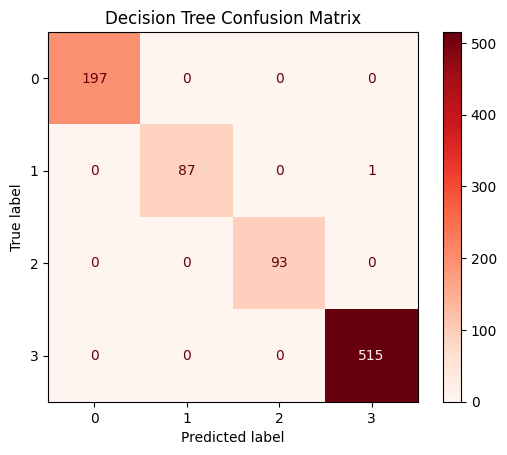

In [7]:
dt = DecisionTreeClassifier(random_state=42, max_depth=12)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")
plt.title("Decision Tree Confusion Matrix")
plt.show()

Accuracy: 90.03%
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       197
           1       0.82      0.74      0.78        88
           2       0.76      0.75      0.76        93
           3       0.92      0.92      0.92       515

    accuracy                           0.90       893
   macro avg       0.86      0.85      0.85       893
weighted avg       0.90      0.90      0.90       893



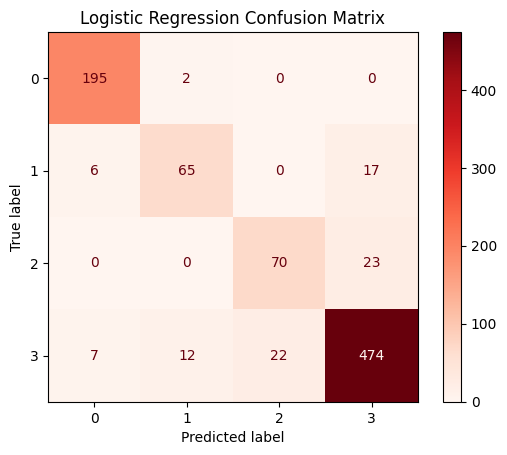

In [8]:
#scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")
plt.title("Logistic Regression Confusion Matrix")

plt.show()

Accuracy: 93.39%
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       197
           1       0.87      0.81      0.84        88
           2       0.93      0.86      0.89        93
           3       0.96      0.95      0.96       515

    accuracy                           0.93       893
   macro avg       0.91      0.90      0.91       893
weighted avg       0.93      0.93      0.93       893



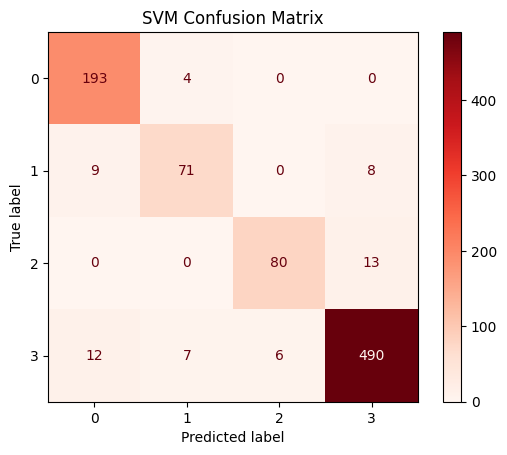

In [9]:
#support vector machine
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")
plt.title("SVM Confusion Matrix")
plt.show()

Accuracy: 89.81%
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       197
           1       0.82      0.74      0.78        88
           2       0.85      0.72      0.78        93
           3       0.93      0.93      0.93       515

    accuracy                           0.90       893
   macro avg       0.87      0.84      0.85       893
weighted avg       0.90      0.90      0.90       893



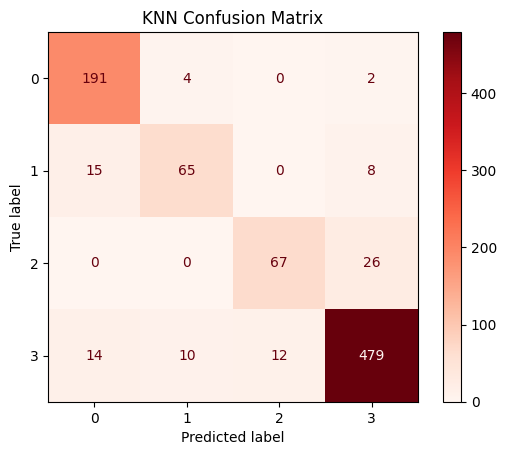

In [10]:
#k-nearest neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")
plt.title("KNN Confusion Matrix")
plt.show()